# Test drawing of broken axis using Column Transformation and Broken Axis

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from dataframes.graph_transform import BarGraphWithColumAsX_axis
from plots.broken_axis import BrokenAxis

## Prepare the data

In [2]:
with open('sampe_data.pickle', 'rb') as f:
    data = pickle.load(f)
    
# process: eleminate some redundant column
data.drop(columns=['close_sp500', 'close_btc', 'gold_usd', 'cpi_us'], inplace=True)
data.fillna(0, inplace=True)
data.reset_index(inplace=True)

data.head(3)

,date,sp500_pct,btc_pct,gold_pct,cpi_us_pct
0,2014-12-31,0.000000,0.000000,0.000000,0.000000
1,2015-12-31,-0.007266,0.344711,-0.123008,0.007295
2,2016-12-31,0.095350,1.232493,0.088525,0.020746


## Draw broken axis

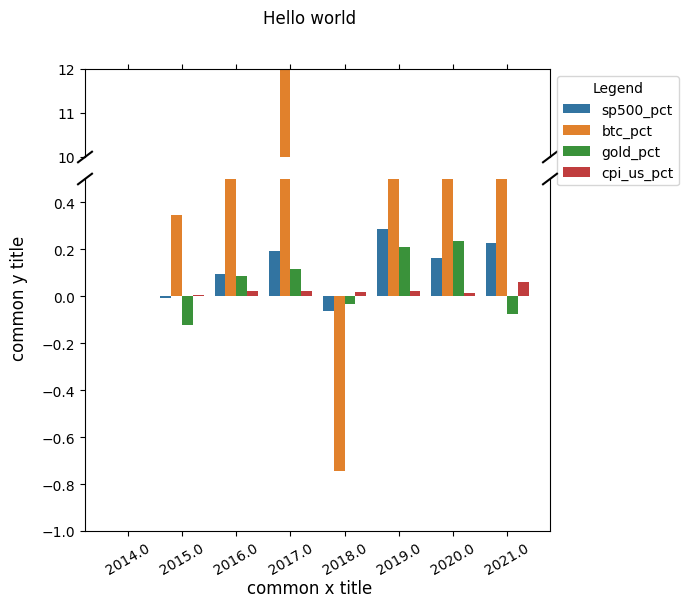

In [3]:
bar_graph_cls = BarGraphWithColumAsX_axis(data, column_as_hue='assets', column_as_x_axis='date', value_label='pct_change')
transfomed_data = bar_graph_cls()

broken_ax = BrokenAxis()
cfg_br_ax = broken_ax.generate_kwargs()

cfg_br_ax['figheight'] = 6
cfg_br_ax['figwidth'] = 6
cfg_br_ax['height_ratio'] = 4
cfg_br_ax['suptitle'] = 'Hello world'
cfg_br_ax['legend_title'] = 'Legend'
cfg_br_ax['x_axis_title'] = 'common x title'
cfg_br_ax['y_axis_title'] = 'common y title'
cfg_br_ax['rotation'] = 30

sns_kwarg = {'x':'date', 'y':'pct_change', 'hue':'assets', 'data': transfomed_data}
broken_ax.add_kwarg_attr(**cfg_br_ax)
fig = broken_ax.draw_plot('barplot', sns_kwarg, (-1, 0.5), (10, 12), np.linspace(2014, 2021, 2021-2014+1), )

plt.show()

### Để save figure:

**Must left `bbox_inches` to `tight` and `pad_inches`**

In [ ]:
plt.savefig('books_read.png', bbox_inches='tight', pad_inches=.3)